# Application: energy consumption in Netherlands (2009-2019)

Three network administrators (Enexis, Liander and Stedin) provide energy (electricty and gas) to almost all Netherlands. These companies provide information about:

1. **net_manager**: regional network manager code 
2. **purchase_area**: code area where the energy is purchased
3. **street**: street name
4. **zipcode_from**: zip postal codes at the beginning of the street
5. **zipcode_to**: zip postal codes at the end of the street 
6. **city**: city name
7. **num_connections**: Number of connections in the range of zip postal codes of the street
8. **delivery_perc**: % of the net energy consumption.
9. **perc_of_active_connections**: % of active connections in the zipcode range
10. **type_of_connection**: principal type of connection in the zipcode range. For electricity is # fuses x # ampères. For gas is G4, G6, G10, G16, G25
11. **type_conn_perc**: % of presence of the principal type of connection in the zipcode range
12. **annual_consume**: Annual energy consumption (Kwh for electricity, and m3 for gas)
13. **annual_consume_lowtarif_perc**: % of consumption during the low tarif time periods (from 10 p.m. to 7 a.m. and during weekends)
14. **smartmeter_perc**: % of smartmeters in the zipcode ranges
    
The data (in .csv format) are available at https://www.kaggle.com/lucabasa/dutch-energy
    
In the present application, we will work with the electrictiy data for 2019 (file called *enexis_electricity_01012019.csv*) to illustrate the standard data manipulation process in Python.


In [105]:
# Load data
from pandas import read_csv
data = read_csv('enexis_electricity_01012019.csv', sep = ',')
data.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,42,100.00,100,50.00,3x25,5459.71,28.82,11.90
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,17,100.00,100,41.18,1x25,4614.24,34.24,41.18
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,11,81.82,100,63.64,1x25,2520.73,34.31,36.36
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,28,100.00,100,39.29,3x25,4275.46,38.34,28.57
4,Enexis B.V.,ENEXIS,Heuveltje,4251AE,4251AG,WERKENDAM,21,90.48,100,42.86,1x25,4620.24,60.18,33.33


# Pie chart and bar plot

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh

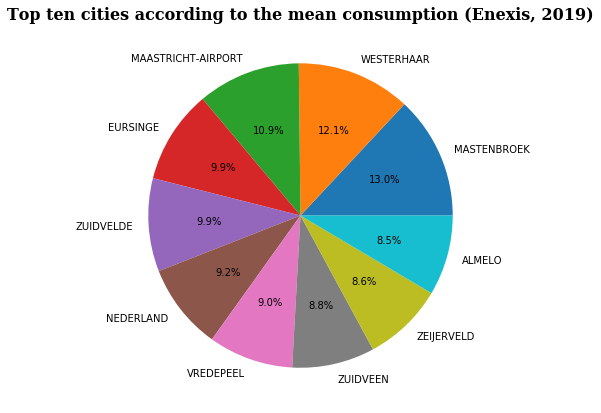

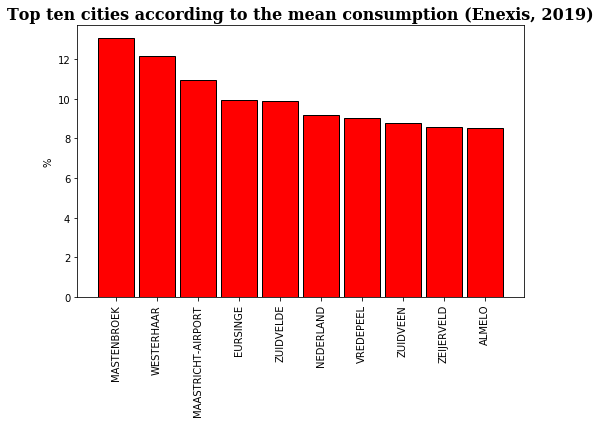

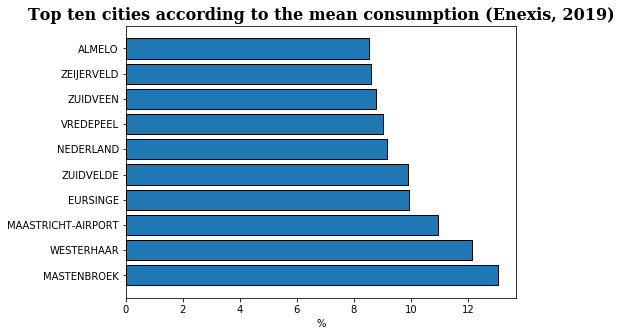

In [106]:
# Top ten cities according to the mean consumption in 20019
dat_g = data.groupby(['city'])['annual_consume'].mean()
dat = dat_g.sort_values(ascending=False).head(10)
dat
dat/dat.sum()*100

from matplotlib import pyplot
# For text properties, see https://matplotlib.org/3.1.1/tutorials/text/text_props.html
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold' ,
        'size': 16,
        }

# Pie chart
pyplot.figure(figsize=[11, 7])
pyplot.pie(dat, labels = dat.index, autopct='%1.1f%%')
pyplot.title('Top ten cities according to the mean consumption (Enexis, 2019)', fontdict=font)
pyplot.show()

# Bar plot
pyplot.figure(figsize=[8, 5])
pyplot.bar(dat.index, dat/dat.sum()*100, width=.9, color = 'r', edgecolor='k', alpha=1)
pyplot.xticks(rotation=90)
pyplot.ylabel('%')
pyplot.title('Top ten cities according to the mean consumption (Enexis, 2019)', fontdict=font)
pyplot.show()

# Horizontal bar plot
pyplot.figure(figsize=[7, 5])
pyplot.barh(dat.index, dat/dat.sum()*100, edgecolor='k', alpha=1)
pyplot.xlabel('%')
pyplot.title('Top ten cities according to the mean consumption (Enexis, 2019)', fontdict=font)
pyplot.show()

# Scatterplots
See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

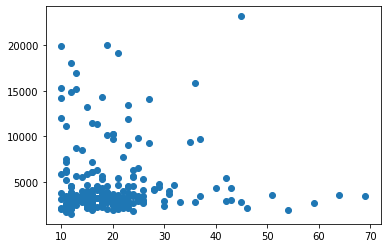

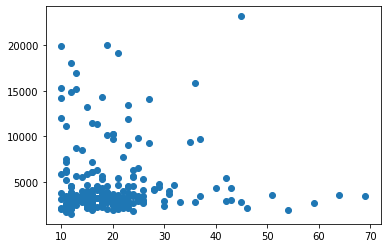

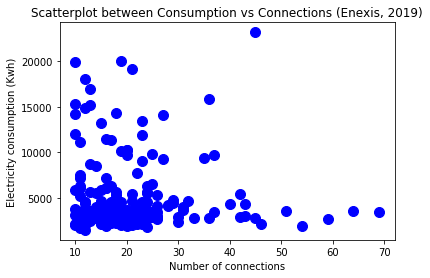

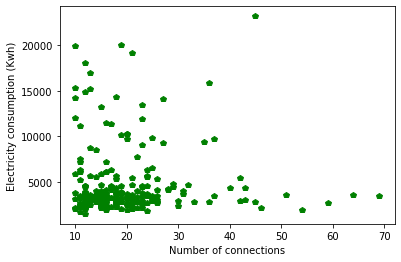

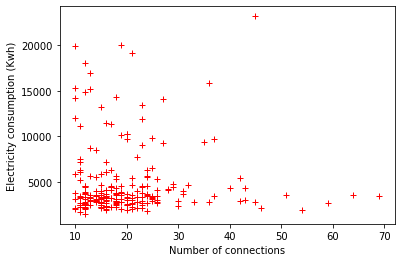

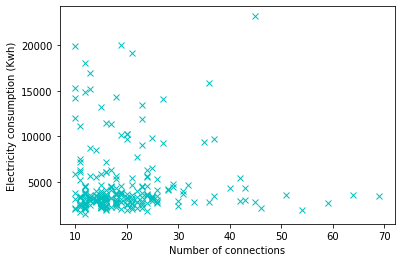

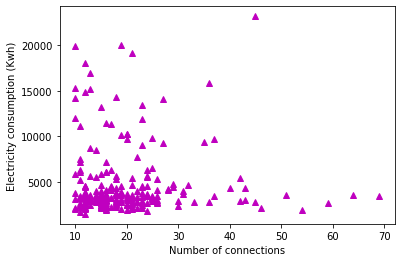

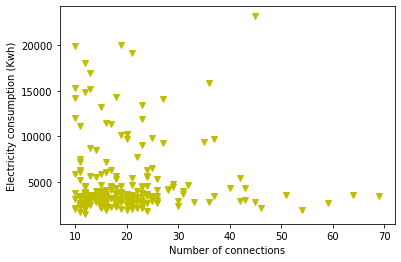

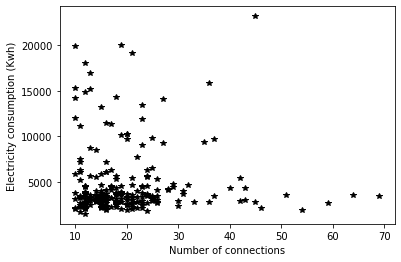

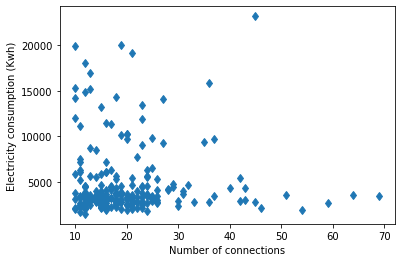

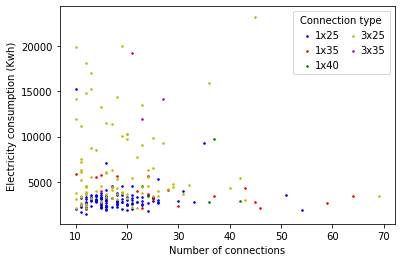

In [107]:
from matplotlib import pyplot

data = data[data['city'] == 'WERKENDAM']
data

# Default
pyplot.plot(data['num_connections'], data['annual_consume'], 'o')
pyplot.show()

# also
pyplot.scatter(data['num_connections'], data['annual_consume'])
pyplot.show()

# axes labes, title and change the style of the points
pyplot.plot(data['num_connections'], data['annual_consume'], 'ob', markersize=10)
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], 'pg')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], '+r')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], 'xc')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], '^m')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], 'vy')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], '*k')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

pyplot.plot(data['num_connections'], data['annual_consume'], 'd')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Scatterplot between Consumption vs Connections (Enexis, 2019)')
pyplot.show()

# Scatter plot with different colors by class (important to classification problems)
import numpy as np    
id_1_25 = np.where(data['type_of_connection'] == '1x25')
id_1_35 = np.where(data['type_of_connection'] == '1x35')
id_1_40 = np.where(data['type_of_connection'] == '1x40')
id_3_25 = np.where(data['type_of_connection'] == '3x25')
id_3_35 = np.where(data['type_of_connection'] == '3x35')

pyplot.scatter(data.iloc[id_1_25].num_connections, data.iloc[id_1_25].annual_consume, s=10, c='b', marker=".", label='1x25')
pyplot.scatter(data.iloc[id_1_35].num_connections, data.iloc[id_1_35].annual_consume, s=10, c='r', marker=".", label='1x35')
pyplot.scatter(data.iloc[id_1_40].num_connections, data.iloc[id_1_40].annual_consume, s=10, c='g', marker=".", label='1x40')
pyplot.scatter(data.iloc[id_3_25].num_connections, data.iloc[id_3_25].annual_consume, s=10, c='y', marker=".", label='3x25')
pyplot.scatter(data.iloc[id_3_35].num_connections, data.iloc[id_3_35].annual_consume, s=10, c='m', marker=".", label='3x35')
pyplot.xlabel('Number of connections')
pyplot.ylabel('Electricity consumption (Kwh)')
pyplot.legend(loc='upper right', title='Connection type', ncol=2, handletextpad=-0.2, columnspacing=0.3, fontsize='medium')
pyplot.show()

# Time series plot

In [109]:
import pandas as pd
import numpy  as np

data_set = pd.read_csv('price.csv', sep = '\t', squeeze = True)
p = data_set.values
index = pd.date_range('2000-01-01', periods = len(data_set), freq = 'H')
price = pd.DataFrame({'price':p}, index = index)

# also
start = np.datetime64('2000-01-01T00:00:00')
end   = np.datetime64('2019-01-01T00:00:00')
t = np.arange(start, end, dtype = 'datetime64[h]')
price = pd.DataFrame({'price':p}, index = t)

#price = pd.DataFrame(data_set)
#price.reindex(index)
#price

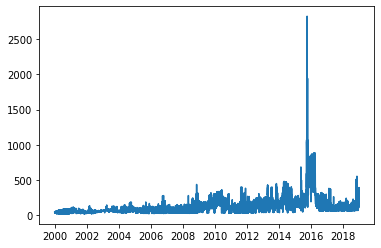

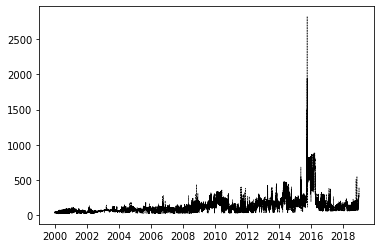

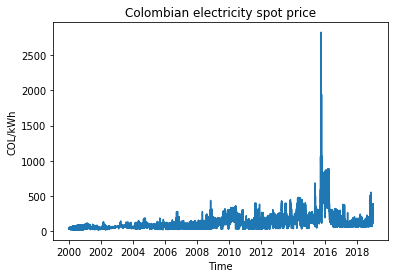

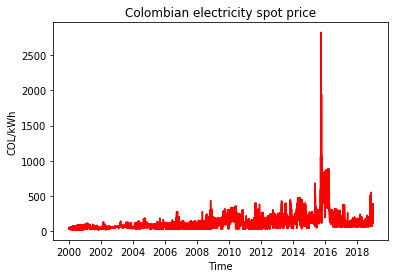

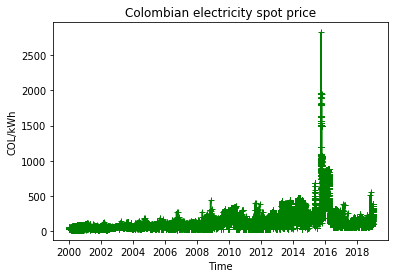

In [110]:
from matplotlib import pyplot

# Time series plot (default)
pyplot.plot(price)
pyplot.show()

# Time series plot changing the line style
pyplot.plot(price, linewidth=0.5, linestyle='--', color='black')
pyplot.show()

# Time series plot with axes labels and title
pyplot.plot(price)
pyplot.title('Colombian electricity spot price')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(t,price,'-r')
pyplot.title('Colombian electricity spot price')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()

pyplot.plot(t,price,'+-g')
pyplot.title('Colombian electricity spot price')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()

# Plots with different different axes

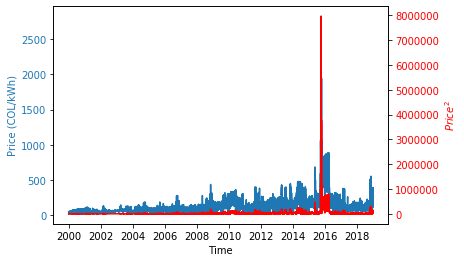

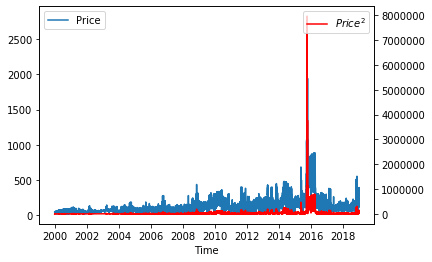

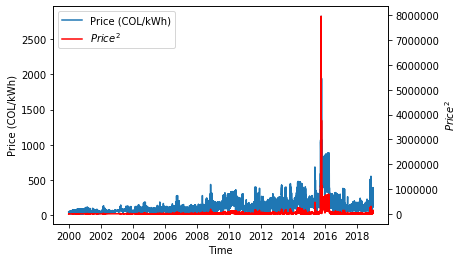

In [220]:
import numpy as np
import matplotlib.pyplot as pyplot

# One option
fig, ax1 = pyplot.subplots()
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (COL/kWh)', color='#1f77b4')
ax1.plot(t, price, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax2 = ax1.twinx()  # second axes that shares the same x-axis
ax2.set_ylabel(r'$Price^2$', color='r')
ax2.plot(t, price**2, color='r')
ax2.tick_params(axis='y', labelcolor='r')
pyplot.show()

# Also
fig, ax = pyplot.subplots()
pyplot.plot(t, price, label='Price')
pyplot.xlabel('Time')
pyplot.legend(loc='upper left')
ax1 = ax.twinx()
pyplot.plot(t, price**2, 'r', label=r'$Price^2$')
pyplot.legend(loc='upper right')
pyplot.show()

# Also
fig, ax1 = pyplot.subplots()
ax1.set_xlabel('Time')
ax1.set_ylabel('Price (COL/kWh)')
l1 = ax1.plot(t, price, label='Price (COL/kWh)')
ax2 = ax1.twinx()
ax2.set_ylabel(r'$Price^2$')
l2 = ax2.plot(t, price**2, label=r'$Price^2$', color='r')
# Solution for having two legends
leg = l1 + l2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)
pyplot.show()

# Correlation matrix plot
See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html#matplotlib.pyplot.matshow

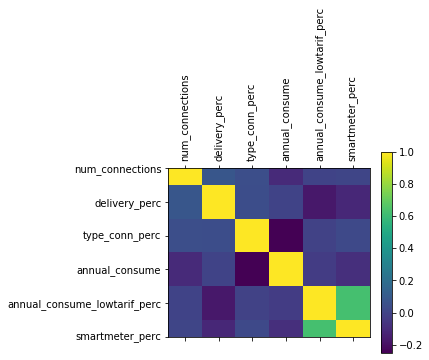

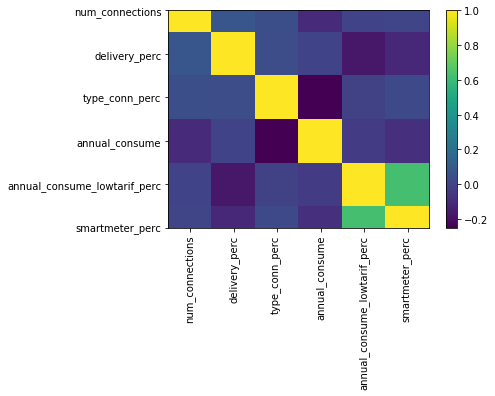

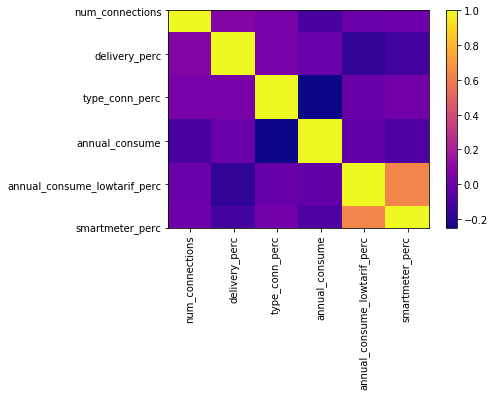

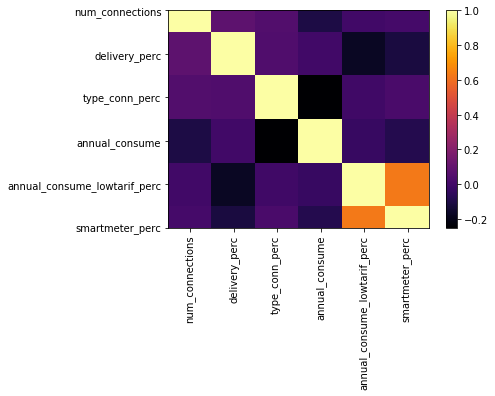

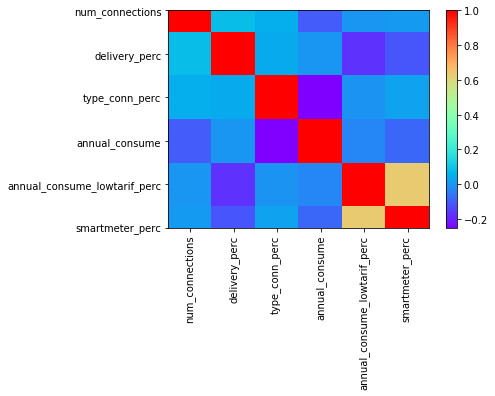

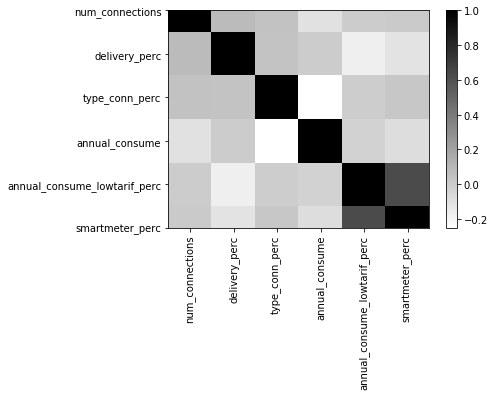

,num_connections,delivery_perc,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
num_connections,1.000000,0.083627,0.049501,-0.099384,0.002514,0.012249
delivery_perc,0.083627,1.000000,0.045351,0.001317,-0.171932,-0.111257
type_conn_perc,0.049501,0.045351,1.000000,-0.250231,-0.005917,0.025360
annual_consume,-0.099384,0.001317,-0.250231,1.000000,-0.027447,-0.082558
annual_consume_lowtarif_perc,0.002514,-0.171932,-0.005917,-0.027447,1.000000,0.632595
smartmeter_perc,0.012249,-0.111257,0.025360,-0.082558,0.632595,1.000000


In [112]:
# Load data
from pandas import read_csv
data = read_csv('enexis_electricity_01012019.csv', sep = ',')
dat = data[['num_connections', 'delivery_perc', 'type_conn_perc', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc']]

import matplotlib.pyplot as pyplot

pyplot.matshow(dat.corr())
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

# Also (and better!)
pyplot.imshow(dat.corr())
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

# change the colormap. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
pyplot.imshow(dat.corr(), cmap='plasma')
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

pyplot.imshow(dat.corr(), cmap='inferno')
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

pyplot.imshow(dat.corr(), cmap='rainbow')
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

pyplot.imshow(dat.corr(), cmap='binary')
pyplot.xticks(range(dat.shape[1]), dat.columns, rotation=90)
pyplot.yticks(range(dat.shape[1]), dat.columns)
pyplot.colorbar(fraction=0.045)
pyplot.show()

dat.corr() # correlation matrix

# Histograms

Assume a $X_1,\ldots,X_n$ random sample from an unknown distribution function $F(x)$ with density function $f(x)=dF(x)/dx$.

The histogram is defined as
$$ \hat{f}_h(x)= \frac{1}{nh}\sum_{i=1}^{n}\sum_{j=1}^k\mathrm{I}(X_i\in B_j)\mathrm{I}(x\in B_j),$$
where $B_j=[x+(j-1)h,\ x+jh)$ is the $j$th bind with bindwidth $h>0$, and 
$$ \mathrm{I}(X_i\in B_j)=
\begin{cases}
1,&X_i\in B_j\\
0,&X_i\notin B_j
\end{cases}
$$

### Number of bins (rules!)

Rule |$k$ | sklearn's name
-|-|-
Sturges | $k=\left\lceil \log_2(n) \right\rceil+1$ | 'sturges'
Freedman–Diaconis|$k=\left\lceil  2\mathrm{IQR}(x)/n^{1/3}\right\rceil$ | 'fd'
Doane|$k=\left\lceil 1 + \log_2(n) + \log_2(1+|\mathrm{skew}(x)|/d)\right\rceil$ | 'doane'
| $d = \sqrt{6(n-2)/((n+1)(n+3))}$ |
Scott|$k=\left\lceil 3.49\sigma(x)n^{-1/3}\right\rceil$ | 'scott'
Rice|$k=\left\lceil 2n^{-1/3}\right\rceil$ | 'rice'
Square-root|$k=\left\lceil n^{1/2}\right\rceil$| 'sqrt'

### Binwidth

* $h=(\max(x)-\min(x))/k$
* Other techniques such as cross-validation

See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

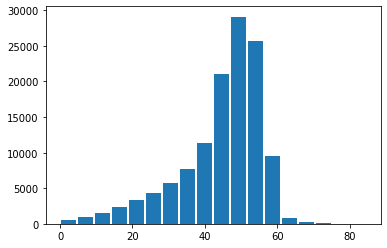

In [113]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import iqr, skew

pyplot.hist(data['annual_consume_lowtarif_perc'], bins='sturges', density=False, rwidth=0.9)
pyplot.show()

#x = data['annual_consume_lowtarif_perc']
#n = data.shape[0]

#'sturges'
#k = np.ceil(np.log2(n))+1

#'fd'
#k = np.ceil(2*(iqr(x)/(n**(1/3))))

#'doane'
#d = np.sqrt((6*(n-2))/((n+1)*(n+3)))
#k = np.ceil(1 + np.log2(n) + np.log2(1+np.abs(skew(x)/d)))

# 'scott'
#k = np.ceil(3.49*np.std(x)*n**(-1/3))

#'rice'
#k = np.ceil(2*n**(1/3))

#'sqrt'
#k = np.ceil(np.sqrt(n))

#h=(np.amax(data['annual_consume_lowtarif_perc'])-np.amin(data['annual_consume_lowtarif_perc']))/bins
#h

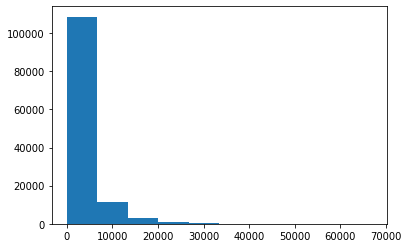

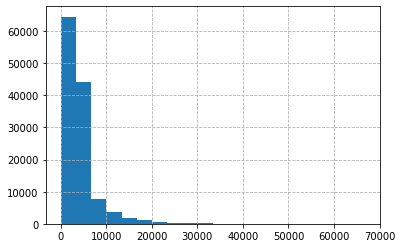

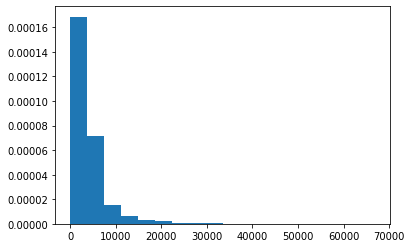

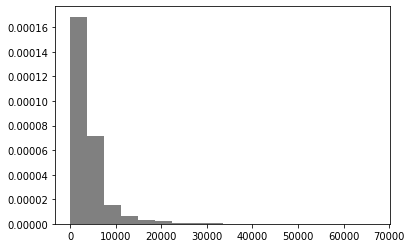

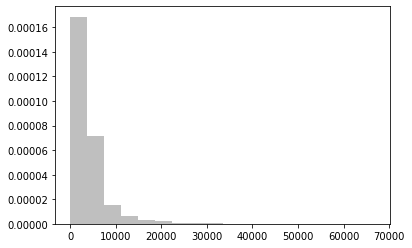

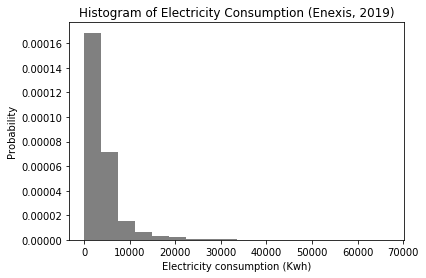

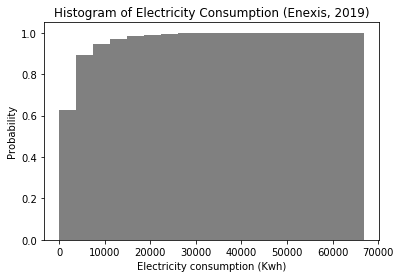

In [114]:
from matplotlib import pyplot

# Default histogram
pyplot.hist(data['annual_consume']) # default bins is 10
pyplot.show()

# Changing the number of binds
pyplot.hist(data['annual_consume'], bins=20, density=False)
pyplot.grid(True, linestyle='--') # to include grid lines
pyplot.show()

# Relative frequencies
pyplot.hist(data['annual_consume'], bins='sturges', density=True)
pyplot.show()

# Changing the color
pyplot.hist(data['annual_consume'], bins='sturges', density=True, facecolor='gray')
pyplot.show()

# Change the color intensity (by default alpha = 1)
pyplot.hist(data['annual_consume'], bins='sturges', density=True, facecolor='gray', alpha=0.5)
pyplot.show()

# Add texts
pyplot.hist(data['annual_consume'], bins='sturges', density=True, facecolor='gray')
pyplot.xlabel('Electricity consumption (Kwh)')
pyplot.ylabel('Probability')
pyplot.title('Histogram of Electricity Consumption (Enexis, 2019)')
pyplot.show()

# Cumulative histogram
pyplot.hist(data['annual_consume'], bins='sturges', density=True, cumulative=True, facecolor='gray')
pyplot.xlabel('Electricity consumption (Kwh)')
pyplot.ylabel('Probability')
pyplot.title('Histogram of Electricity Consumption (Enexis, 2019)')
pyplot.show()

# Subplots
See https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

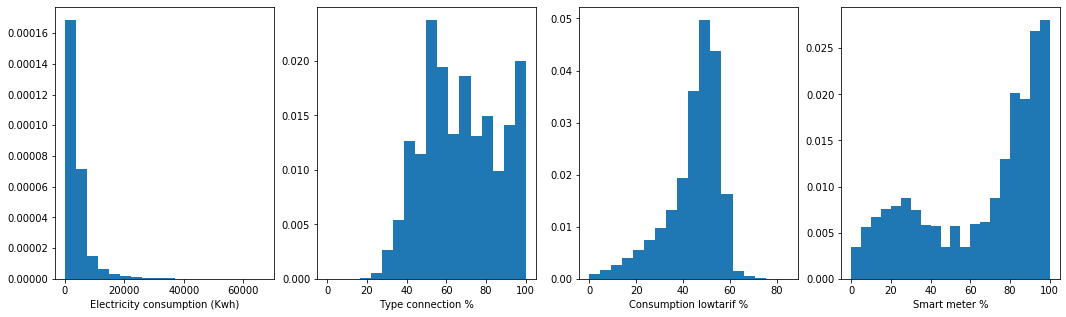

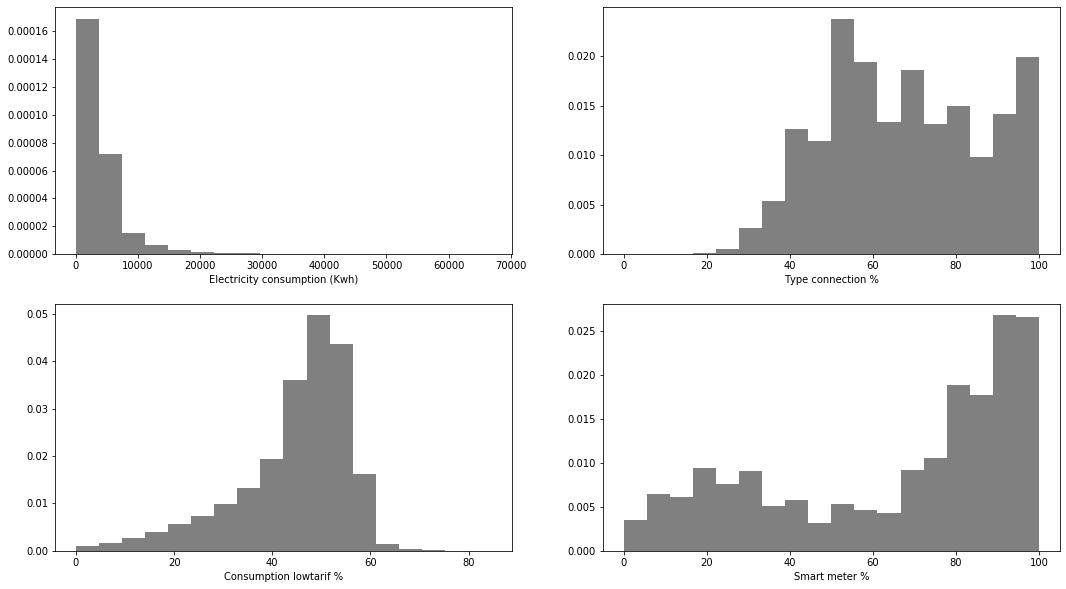

In [115]:
from matplotlib import pyplot
import numpy as np

fig, axs = pyplot.subplots(1, 4, figsize=(18, 5), sharey=False)
axs[0].hist(data['annual_consume'], bins='sturges', density=True)
axs[0].set_xlabel('Electricity consumption (Kwh)')
axs[1].hist(data['type_conn_perc'], bins='sturges', density=True)
axs[1].set_xlabel('Type connection %')
axs[2].hist(data['annual_consume_lowtarif_perc'], bins='sturges', density=True)
axs[2].set_xlabel('Consumption lowtarif %')
axs[3].hist(data['smartmeter_perc'], bins=20, density=True)
axs[3].set_xlabel('Smart meter %')
pyplot.show()

fig, axs = pyplot.subplots(2, 2, figsize=(18, 10), sharey=False)
axs[0,0].hist(data['annual_consume'], bins='sturges', density=True, facecolor='gray')
axs[0,0].set_xlabel('Electricity consumption (Kwh)')
axs[0,1].hist(data['type_conn_perc'], bins='sturges', density=True, facecolor='gray')
axs[0,1].set_xlabel('Type connection %')
axs[1,0].hist(data['annual_consume_lowtarif_perc'], bins='sturges', density=True, facecolor='gray')
axs[1,0].set_xlabel('Consumption lowtarif %')
axs[1,1].hist(data['smartmeter_perc'], bins='sturges', density=True, facecolor='gray')
axs[1,1].set_xlabel('Smart meter %')
pyplot.show()

# Nonparametric density estimation

The kernel estimator of the density $f(x)$ of a random variable $X$ is given by
$$
\hat{f}_n(x)=\frac{1}{n\lambda}\sum_{i=1}^{n}K\left(\frac{x_i-x}{\lambda}\right) 
$$
where the kernel function $K:\mathbb{R}\to\mathbb{R}$ assigns a weight to each $x_i$ based on its distance from $x$, and the $\lambda > 0$ parameter defines the smoothing bandwidth of the local neighborhood.

Kernel |$K(u)$ | sklearn's name
-|-|-
Rectangular | $\tfrac{1}{2}I(|u|\leq1)$ | 'tophat'
Triangular|$(1-|u|)I(|u|\leq1)$ | 'linear'
Epanechnikov|$\tfrac{3}{4}\left(1-u^2\right) I(|u|\leq1)$ | 'epanechnikov'
Biweight|$\tfrac{15}{16}\left(1-u^2\right)^2I(|u|\leq1)$ | NA
Triweight|$\tfrac{35}{32}\left(1-u^2\right)^3I(|u|\leq1)$ | NA
Gaussian|$\tfrac{1}{\sqrt{2\pi}}\exp\left(-u^2/2\right)$ | 'gaussian'
Silverman|$\tfrac{1}{2}\exp\left(-|u|\sqrt{2}\right)\sin\left(|u|/\sqrt{2}+\pi/4\right)$ | 'exponential'
Cosine|$\tfrac{\pi}{4}\cos\left(\tfrac{\pi}{2}u\right)I(|u|\leq1)$ | 'cosine'

### Rule-of-thumb smoothing bandwidth estimator

* Silverman: $0.9\min\left\lbrace \hat{\sigma}, \frac{\mathrm{IQR}}{1.34}\right\rbrace n^{-1/5}$
* Scott: $\left(\frac{4\hat{\sigma}^5}{3n}\right)^{1/5}$
* Others

See https://scikit-learn.org/stable/modules/density.html

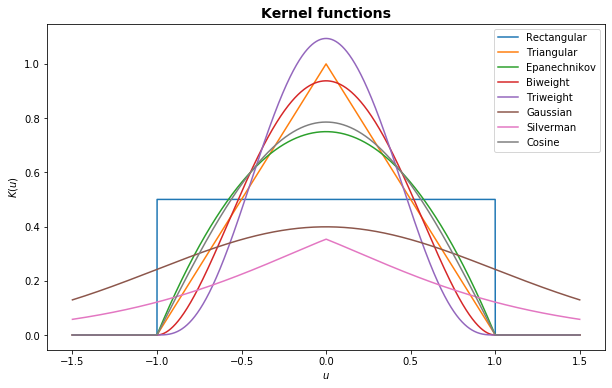

In [142]:
from matplotlib import pyplot
import numpy as np
import pandas as pd

u = np.arange(-1.5, 1.5, 0.00001)
rect = 0.5*pd.get_dummies(np.abs(u) <=1)[1]
triang = (1-np.abs(u))*pd.get_dummies(np.abs(u) <=1)[1]
epa = (3/4)*(1-np.abs(u)**2)*pd.get_dummies(np.abs(u) <=1)[1]
bi = (15/16)*((1-np.abs(u)**2)**2)*pd.get_dummies(np.abs(u) <=1)[1]
tri = (35/32)*((1-np.abs(u)**2)**3)*pd.get_dummies(np.abs(u) <=1)[1]
gaussian = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*u**2)
silv = 0.5*np.exp(-np.abs(u)*np.sqrt(2))*np.sin(np.abs(u)/np.sqrt(2)+np.pi/4)
cos = (np.pi/4)*np.cos(0.5*np.pi*u)*pd.get_dummies(np.abs(u) <=1)[1]

fig, ax = pyplot.subplots(1, 1, figsize=(10, 6), sharey=False)
ax.plot(u, rect, label='Rectangular')
ax.plot(u, triang, label='Triangular')
ax.plot(u, epa, label='Epanechnikov')
ax.plot(u, bi, label='Biweight')
ax.plot(u, tri, label='Triweight')
ax.plot(u, gaussian, label='Gaussian')
ax.plot(u, silv, label='Silverman')
ax.plot(u, cos, label='Cosine')
pyplot.ylabel(r'$K(u)$')
pyplot.xlabel(r'$u$')
pyplot.title('Kernel functions', fontdict={'weight':'bold', 'size':14})
pyplot.legend(loc='upper right')
pyplot.show()

In [135]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import iqr, skew

x = data['annual_consume_lowtarif_perc']
n = data.shape[0]

# Silverman rule-of-thumb
#h=0.9*np.minimum(np.std(x),iqr(x)/1.34)*(n**(-1/5))
#h

# Scott rule-of-thumb
#h = ((4*(np.std(x)**5))/(3*n))**(1/5) # approx to 1.06*np.std(x)*(n**(-1/5))
#h=3.5

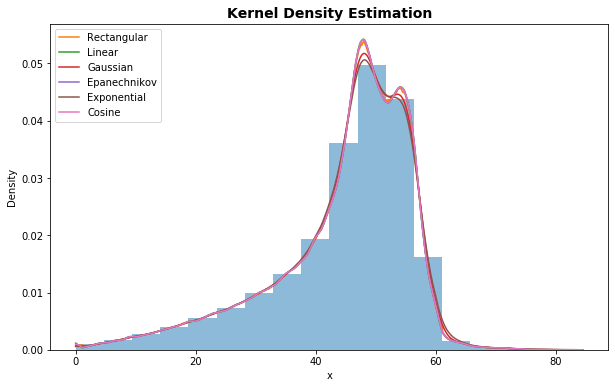

In [179]:
import numpy as np
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot

#x = data['annual_consume_lowtarif_perc'].to_numpy()[:, np.newaxis] # Series to numpy
x = data['annual_consume_lowtarif_perc'].values[:, np.newaxis] # dataframe to numpy
#x = data['smartmeter_perc'].values[:, np.newaxis]
x_d = np.linspace(x.min(), x.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x

fig, ax = pyplot.subplots(1, 1, figsize=(10, 6), sharey=False)
ax.hist(x, bins='sturges', density=True, alpha=0.5)
# Rectangular kernel
f_hat = KernelDensity(kernel='tophat', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Rectangular')

# Linear kernel
f_hat = KernelDensity(kernel='linear', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Linear')

# Gaussian kernel
f_hat = KernelDensity(kernel='gaussian', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Gaussian')

# Epanechnikov kernel
f_hat = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Epanechnikov')

# Exponential kernel
f_hat = KernelDensity(kernel='exponential', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Exponential')

# Cosine kernel
f_hat = KernelDensity(kernel='cosine', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
ax.plot(x_d, np.exp(log_dens), label = 'Cosine')

pyplot.xlabel('x')
pyplot.ylabel('Density')
pyplot.legend(loc='upper left')
pyplot.title('Kernel Density Estimation', fontdict={'weight':'bold', 'size':14})
pyplot.show()

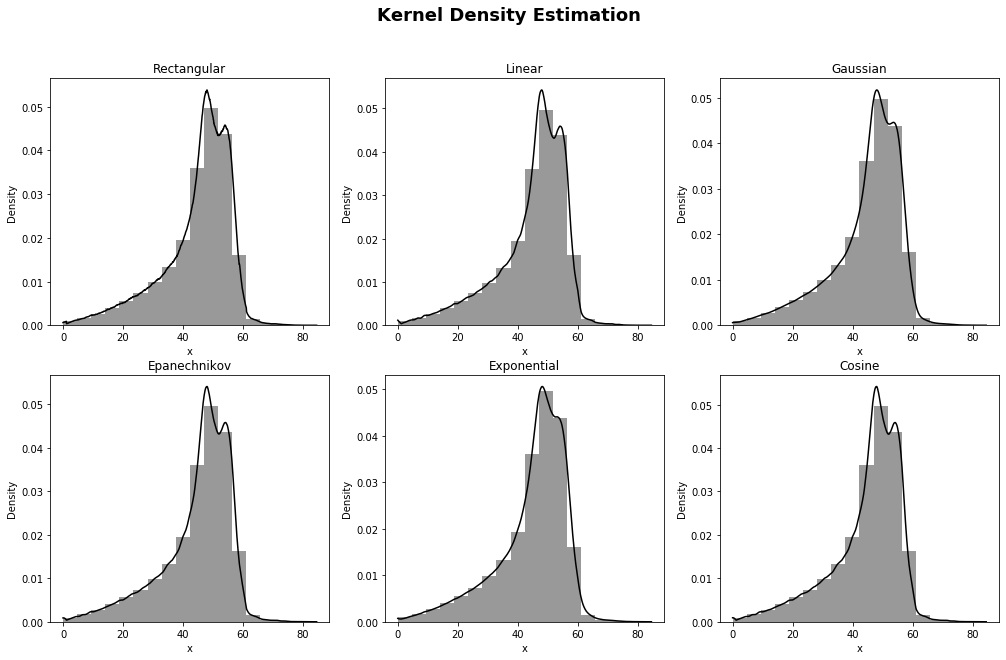

In [178]:
import numpy as np
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot

#x = data['annual_consume_lowtarif_perc'].to_numpy()[:, np.newaxis] # Series to numpy
x = data['annual_consume_lowtarif_perc'].values[:, np.newaxis] # dataframe to numpy
#x = data['smartmeter_perc'].values[:, np.newaxis]
x_d = np.linspace(x.min(), x.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x

fig, axs = pyplot.subplots(2, 3, figsize=(17, 10), sharey=False)
# Rectangular kernel
f_hat = KernelDensity(kernel='tophat', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
#pyplot.fill(x_d, np.exp(log_dens)) # plot between the probability density estimate and x_d
axs[0,0].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[0,0].plot(x_d, np.exp(log_dens), label = 'Rectangular', color='k')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('Density')
axs[0,0].set_title('Rectangular')

# Linear kernel
f_hat = KernelDensity(kernel='linear', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
axs[0,1].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[0,1].plot(x_d, np.exp(log_dens), label = 'Linear', color='k')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('Density')
axs[0,1].set_title('Linear')

# Gaussian kernel
f_hat = KernelDensity(kernel='gaussian', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
axs[0,2].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[0,2].plot(x_d, np.exp(log_dens), label = 'Gaussian', color='k')
axs[0,2].set_xlabel('x')
axs[0,2].set_ylabel('Density')
axs[0,2].set_title('Gaussian')

# Epanechnikov kernel
f_hat = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
axs[1,0].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[1,0].plot(x_d, np.exp(log_dens), label = 'Epanechnikov', color='k')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Density')
axs[1,0].set_title('Epanechnikov')

# Exponential kernel
f_hat = KernelDensity(kernel='exponential', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[1,1].plot(x_d, np.exp(log_dens), label = 'Exponential', color='k')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Density')
axs[1,1].set_title('Exponential')

# Cosine kernel
f_hat = KernelDensity(kernel='cosine', bandwidth=h).fit(x) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(x_d) # score_samples returns the log of the estimated probability density
axs[1,2].hist(x, bins='sturges', density=True, color='gray', alpha=0.8)
axs[1,2].plot(x_d, np.exp(log_dens), label = 'Cosine', color='k')
axs[1,2].set_xlabel('x')
axs[1,2].set_ylabel('Density')
axs[1,2].set_title('Cosine')

fig.suptitle('Kernel Density Estimation', weight='bold', size=18)
pyplot.show()

In [ ]:
# bandwidth selection 
from sklearn.model_selection import GridSearchCV, LeaveOneOut
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut()).fit(x)
grid.best_params_

# Box-plots

These plots show main features about a variable $X$:
* Center
* Spread
* Asymmetry
* Outliers

<img src='boxplot.png' width='700' />

Source: https://www.leansigmacorporation.com/box-plot-with-minitab/

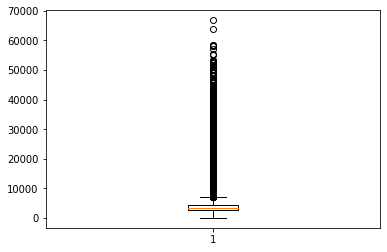

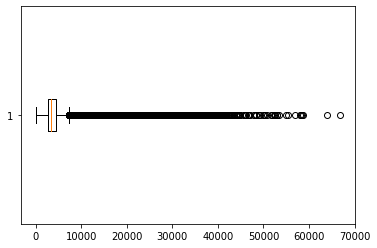

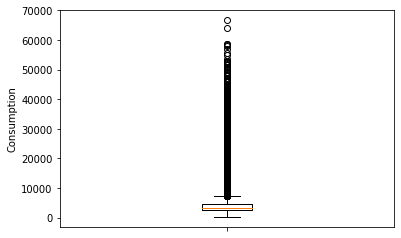

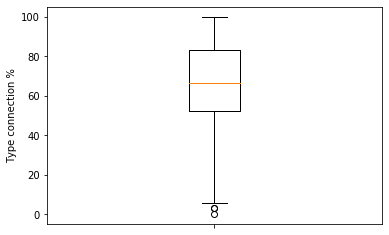

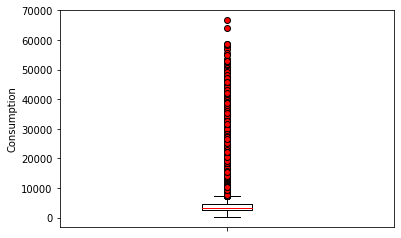

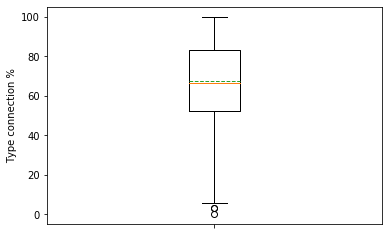

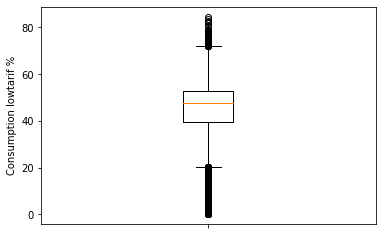

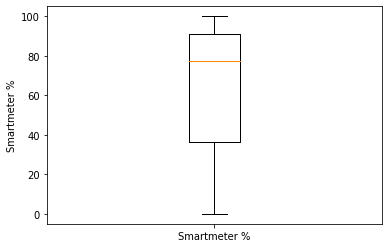

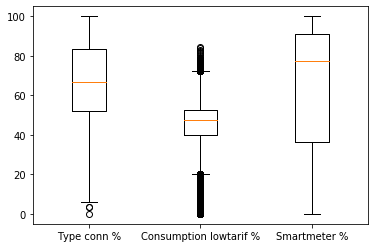

In [242]:
import pandas as pd
from matplotlib import pyplot

pyplot.boxplot(data['annual_consume'], vert=True)
pyplot.show()

# change the  vertical (default) diretion for horizontal
pyplot.boxplot(data['annual_consume'], vert=False)
pyplot.show()

# change the label of the variable (by default it is set to 1)
pyplot.boxplot(data['annual_consume'], vert=True, labels=[''])
pyplot.ylabel('Consumption')
pyplot.show()

pyplot.boxplot(data['type_conn_perc'], vert=True, labels=[''])
pyplot.ylabel('Type connection %')
pyplot.show()

# change de style pf the potential outliers and the median
fliers_style = dict(markerfacecolor='r', marker='o')
median_style = dict(color='r', linestyle='-')
pyplot.boxplot(data['annual_consume'], vert=True, labels=[''], flierprops=fliers_style, medianprops=median_style)
pyplot.ylabel('Consumption')
pyplot.show()

# show the mean line
pyplot.boxplot(data['type_conn_perc'], vert=True, labels=[''], meanline=True, showmeans=True)
pyplot.ylabel('Type connection %')
pyplot.show()

pyplot.boxplot(data['annual_consume_lowtarif_perc'], vert=True, labels=[''])
pyplot.ylabel('Consumption lowtarif %')
pyplot.show()

pyplot.boxplot(data['smartmeter_perc'], vert=True, labels=['Smartmeter %'])
pyplot.ylabel('Smartmeter %')
pyplot.show()

# multiple variables
dat = pd.DataFrame(data[['type_conn_perc', 'annual_consume_lowtarif_perc', 'smartmeter_perc']])

pyplot.boxplot(dat.values, vert=True, labels=['Type conn %', 'Consumption lowtarif %', 'Smartmeter %'])
pyplot.show()

# Violin plots

These are modifications of the Tukey's original boxplot. In particular, it adds information from the local density estimates to the statistics in the boxplot, providing a useful tool for exploratory data analysis.

By adding the density estimate to the boxplot, the violin plots provide indications of the shape of the distribution, for instance the existence of clusters, peaks, valleys, and
bumps in the distribution of $X$.

See https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

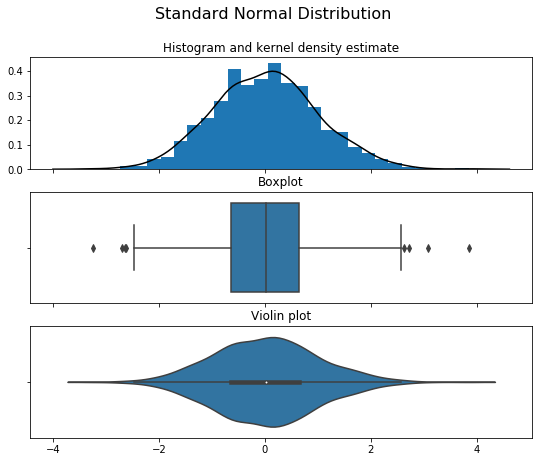

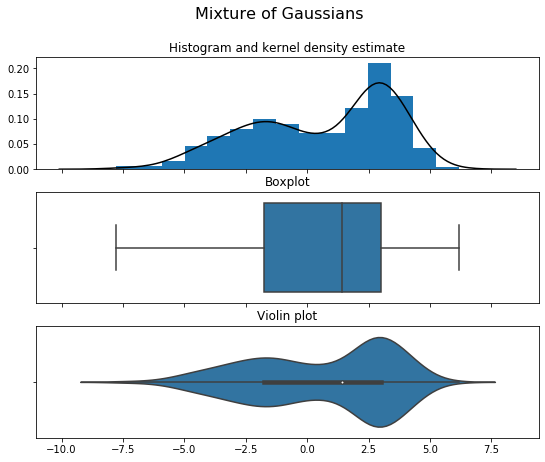

1000

In [227]:
# Example from https://towardsdatascience.com/violin-plots-explained-fb1d115e023d
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

n = 10**3
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = pyplot.subplots(3, 1, figsize=(9, 7), sharex=True)
    sns.distplot(x, ax=ax[0], color='#1f77b4', hist_kws=dict(alpha=1), kde_kws=dict(color='k'))
    ax[0].set_title('Histogram and kernel density estimate')
    sns.boxplot(x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    pyplot.show()
    
sample_gaussian = np.random.normal(size=n)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(n/2)),
                                 np.random.normal(loc=3, scale=1, size=int(n/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians')

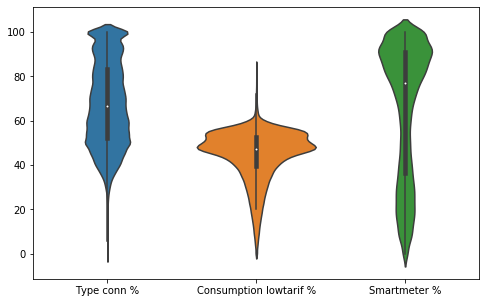

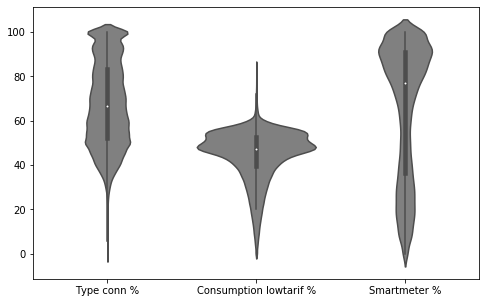

In [247]:
import seaborn as sns
from matplotlib import pyplot

dat = pd.DataFrame(data[['type_conn_perc', 'annual_consume_lowtarif_perc', 'smartmeter_perc']])

pyplot.figure(figsize=[8, 5])
ax = sns.violinplot(data=dat)
ax.set_xticklabels(['Type conn %', 'Consumption lowtarif %', 'Smartmeter %'])
pyplot.show()

pyplot.figure(figsize=[8, 5])
ax = sns.violinplot(data=dat, color='gray')
ax.set_xticklabels(['Type conn %', 'Consumption lowtarif %', 'Smartmeter %'])
pyplot.show()

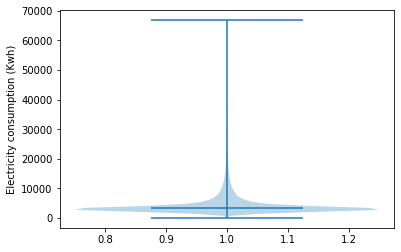

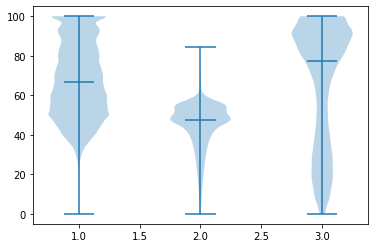

In [248]:
import pandas as pd
from matplotlib import pyplot

pyplot.violinplot(data['annual_consume'], vert=True, showmedians=True, showmeans=False)
pyplot.ylabel('Electricity consumption (Kwh)')
#pyplot.title('Violinplot of Electricity Consumption (Enexis, 2019)')
pyplot.show()

dat = pd.DataFrame(data[['type_conn_perc', 'annual_consume_lowtarif_perc', 'smartmeter_perc']])

pyplot.violinplot(dat.values, vert=True, showmedians=True)
pyplot.show()

# Saving plots

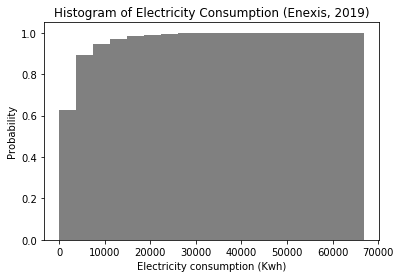

In [55]:
# Cumulative histogram
pyplot.hist(data['annual_consume'], bins='sturges', density=True, cumulative=True, facecolor='gray')
pyplot.xlabel('Electricity consumption (Kwh)')
pyplot.ylabel('Probability')
pyplot.title('Histogram of Electricity Consumption (Enexis, 2019)')
#pyplot.savefig('Fig1.eps')
#pyplot.savefig('Fig1.pdf')
#pyplot.savefig('Fig1.png')
pyplot.show()